# Bigraph Schema Basics
This tutorial demonstrates use of [bigraph-viz](https://github.com/vivarium-collective/bigraph-viz), a visualization tool for bigraph composition schema. The tutorial starts with a single `store` and increases in detail as you scroll towards the bottom.

Compositional Bigraph Schemas (CBS) are based on a mathematical formalism [introduced by Robin Milner in 2009](https://www.google.com/search?q=the+space+and+motion+of+communicating+agents+by+robin+milner), and used in Vivarium. Bigraphs consist of networks with embeddable nodes that can be placed within other nodes and dynamically restructured. CBS reimagines the bigraph concept. Variables are contained within Stores (the circles in the figure), which can be embedded in a hierarchy, as shown by the dark edges. Instead of Milner's hyperedges, CBS employs Processes (the rectangles) which connect via wires (dashed edges) to shared variables within the Stores. Processes and Stores form a type of bipartite graph, as illustrated by the dashed edges.

## Imports and settings

In [1]:
from bigraph_viz import plot_bigraph, plot_flow, plot_multitimestep

plot_settings = {
    'remove_process_place_edges': True,
}
save_images = False
if save_images:
    plot_settings.update({
        'out_dir': 'out',
        'dpi': '250'
    })

In [2]:
help(plot_bigraph)

Help on function plot_bigraph in module bigraph_viz.plot:

plot_bigraph(bigraph_schema, size='16,10', node_label_size='12pt', show_values=False, show_types=False, collapse_processes=False, port_labels=True, port_label_size='10pt', engine='dot', rankdir='TB', node_border_colors=None, node_fill_colors=None, node_groups=False, invisible_edges=False, remove_process_place_edges=False, print_source=False, dpi='70', file_format='png', out_dir=None, filename=None)
    Plot a bigraph from bigraph schema.
    
    Args:
        bigraph_schema (dict): The bigraph schema dict that will be plotted.
        size (str, optional): The size of the output figure (example: '16,10'). Default is '16,10'.
        node_label_size (str, optional): The font size for the node labels. Default is None.
        show_values (bool, optional): Display on value info in node label. Default is False.
        show_types (bool, optional): Display on type info in node label. Default is False.
        collapse_processes (bo

## Stores

### Simple stores
An store can be declared in a JSON dictionary with the store's name mapped to its value. 

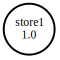

In [3]:
simple_store_spec = {
    'store1': 1.0,
}
plot_bigraph(simple_store_spec, **plot_settings, show_values=True, filename='simple_store')

To include values *and* types in a node label, you can instead have the store name map to a dict with `_value` and `_type` keys.

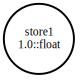

In [4]:
typed_store_spec = {
    'store1': {
        '_value': 1.0, 
        '_type': 'float',
    },
}
plot_bigraph(typed_store_spec, **plot_settings, show_values=True, show_types=True, filename='store')

### Hierarchy
A hierarchy is a place graph of nested stores. Stores can be placed within stores using JSON dictionary nesting.

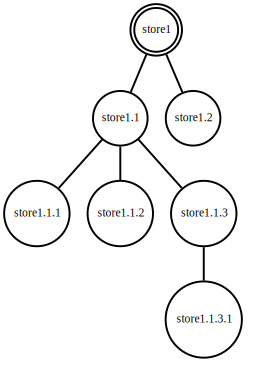

In [5]:
hierarchy_spec = {
    'store1': {
        'store1.1': {
            'store1.1.1': {'_value': 1.1, '_type': 'float'},
            'store1.1.2': {'_value': 2, '_type': 'int'},
            'store1.1.3': {
                'store1.1.3.1': {'_value': 0.1, '_type': 'float'},
            },
        },
        'store1.2': {'_value': 1, '_type': 'int'},
    },
}
plot_bigraph(hierarchy_spec, **plot_settings, filename='hierarchy')

## Processes

### Single process
Processes require ports, which are declared with the `_ports` key mapped to a dict that has port names matched to types.

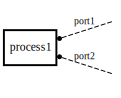

In [6]:
process_spec = {
    'process1': {
        '_ports': {
            'port1': {'_type': 'type'},
            'port2': {'_type': 'type'},
        },
    },
}
plot_bigraph(process_spec, **plot_settings, rankdir='RL', filename='process')

### Multiple processes

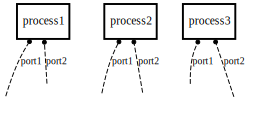

In [7]:
process_schema = {
    '_ports': {
        'port1': {'_type': 'type'},
        'port2': {'_type': 'type'}
    }
}

processes_spec = {
    'process1': process_schema,
    'process2': process_schema,
    'process3': process_schema,
}
plot_bigraph(processes_spec, **plot_settings, rankdir='BT', filename='multiple_processes')

## Wires
To connect a process's ports to stores, add wiring with a `_wires` key that maps port names to relative paths in the store hierarchy. The ports used by the wires need to match the ports in the schema.

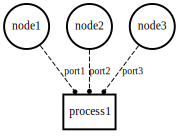

In [8]:
connected_process_spec = {
    'process1': {
        '_ports': {
            'port1': {'_type': 'float'},
            'port2': {'_type': 'int'},
            'port3': {'_type': 'int'},
        },
        '_wires': {
            'port1': 'node1',
            'port2': 'node2',
            'port3': 'node3',
        }
    },
    'node1': 1.1,
    'node2': 2,
    'node3': 2,
}
plot_bigraph(connected_process_spec, **plot_settings, filename='wires')

### Processes are hyperedges
When we collapse processes from the graph, their connections become hyperedges, and the Process Bigraph can be depicted as a standard Milner Bigraph

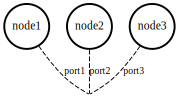

In [9]:
plot_bigraph(connected_process_spec, collapse_processes=True, **plot_settings, filename='hyperedge')

### Advanced wiring
**TODO**

## Composites

### Flat composite
A flat composite connects stores with multiple connected processes, without nesting.

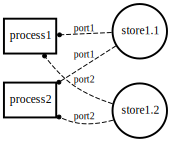

In [10]:
flat_composite_spec = {
    'store1.1': {
        '_value': 1.1, 
        '_type': 'float',
    },
    'store1.2': {
        '_value': 2, 
        '_type': 'int',
    },
    'process1': {
        # '_ports': {
        #     'port1': 'type', 
        #     'port2': 'type',
        # },
        '_wires': {
            'port1': 'store1.1',
            'port2': 'store1.2',
        }
    },
    'process2': {
        # '_ports': {
        #     'port1': 'type', 
        #     'port2': 'type',
        # },
        '_wires': {
            'port1': 'store1.1',
            'port2': 'store1.2',
        }
    },
}
plot_bigraph(flat_composite_spec, **plot_settings, rankdir='RL', filename='flat_composite')

### Nested composite
A nested composite has store hierarchies with multiple connected processes.

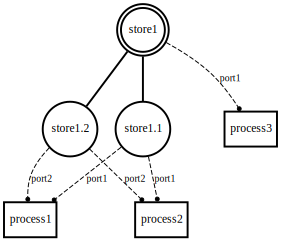

In [11]:
nested_composite_spec = {
    'store1': {
        'store1.1': {
            '_value': 1.1, 
            '_type': 'float',
        },
        'store1.2': {
            '_value': 2, 
            '_type': 'int',
        },
        'process1': {
            # '_ports': {
            #     'port1': 'type', 
            #     'port2': 'type',
            # },
            '_wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
        'process2': {
            # '_ports': {
            #     'port1': 'type', 
            #     'port2': 'type',
            # },
            '_wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
    },
    'process3': {
        '_wires': {
            'port1': 'store1',
        }
    }
}
plot_bigraph(nested_composite_spec, **plot_settings, filename='nested_composite')

### Composite process
Composite processes are processes with internal stores and internal processes, which can run as their own simulation. The composite process has schema, allowing it to connect to a super-simulation. This allows for improved distributed computation, with composite processes able to run on their own computer and syncronize to the super-simulation via message passing.

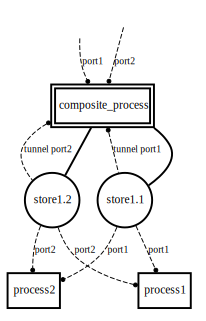

In [12]:
composite_process_spec = {
    'composite_process': {
        'store1.1': {
            '_value': 1.1, 
            '_type': 'float',
        },
        'store1.2': {
            '_value': 2, 
            '_type': 'int',
        },
        'process1': {
            # '_ports': {
            #     'port1': 'type', 
            #     'port2': 'type',
            # },
            '_wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
        'process2': {
            # '_ports': {
            #     'port1': 'type', 
            #     'port2': 'type',
            # },
            '_wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
        '_ports': {
            'port1': 'type', 
            'port2': 'type', 
        },
        '_tunnels': {
            'port1': 'store1.1',
            'port2': 'store1.2',
        }
    }
}
plot_bigraph(composite_process_spec, **plot_settings, filename='composite_process')

## Orchestration

In [13]:
plot_settings2={}
if save_images:
    plot_settings2.update({
        'out_dir': 'out',
        'dpi': '250'
    })

### Multi-timestepping

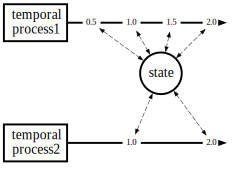

In [14]:
multitimestep_spec = {
    'temporal<br/>process2': {
        '_ports': {'port1': 'type'},
        '_wires': {'port1': 'state'},
        '_sync_step': 1.0,
    },
    'temporal<br/>process1': {
        '_ports': {'port1': 'type'},
        '_wires': {'port1': 'state'},
        '_sync_step': 0.5,
    },
}
plot_multitimestep(multitimestep_spec, total_time=2.0, **plot_settings2, filename='multitimestep')

### Flows

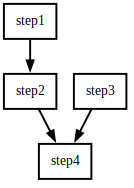

In [15]:
process_schema = {
    '_type': 'step_process',
    '_ports': {
        'port1': 'type',
        'port2': 'type'
    }
}

flow_spec = {
    'step1': {
        '_depends_on': [], 
        **process_schema
    },
    'step2': {
        '_depends_on': 'step1', 
        **process_schema
    },
    'step3': {
        '_depends_on': [], 
        **process_schema
    },
    'step4': {
        '_depends_on': ['step2', 'step3'], 
        **process_schema
    },
}
plot_flow(flow_spec, **plot_settings2, filename='flow')

## Examples

### Cell structure and function
Bigraphs can represent the hierarchical nesting of cellular structures, and processes represent their functions.

Writing out/cell


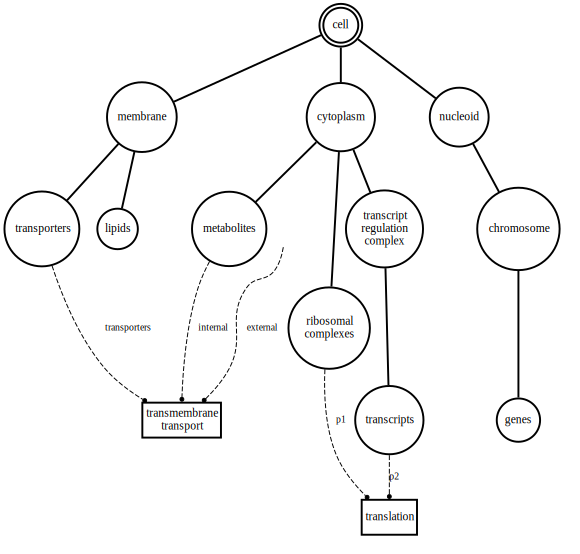

In [16]:
cell_struct_func = {
        'cell': {
            'membrane': {
                'transporters': 'concentrations',
                'lipids': 'concentrations',
                'transmembrane<br/>transport': {
                    '_value': {
                        '_process': 'transport URI',
                        '_config': {'parameter': 1}
                    },
                    '_wires': {
                        'transporters': 'transporters',
                        'internal': ['..', 'cytoplasm', 'metabolites']},
                    '_ports': {
                        'transporters': 'concentrations',
                        'internal': 'concentrations',
                        'external': 'concentrations'
                    }
                }
            },
            'cytoplasm': {
                'metabolites': {
                    '_value': 1.1,
                    '_type': 'concentrations'
                },
                'ribosomal<br/>complexes': {
                    '_value': 2.2,
                    '_type': 'concentrations'
                },
                'transcript<br/>regulation<br/>complex': {
                    '_value': 0.01,
                    '_type': 'concentrations',
                    'transcripts': {
                        '_value': 0.1,
                        '_type': 'concentrations'
                    }
                },
                'translation': {
                    '_wires': {
                        'p1': 'ribosomal<br/>complexes',
                        'p2': ['transcript<br/>regulation<br/>complex', 'transcripts']}}},
            'nucleoid': {
                'chromosome': {
                    'genes': 'sequences'
                }
            }
        }
    }
plot_bigraph(cell_struct_func, remove_process_place_edges=True, out_dir='out', filename='cell')

## Multiscale map of a cell

We here plot the multiscale map of a cell from [Qin et al. A multi-scale map of cell structure fusing protein images and interactions. Nature. 2021.](https://pubmed.ncbi.nlm.nih.gov/34819669/)

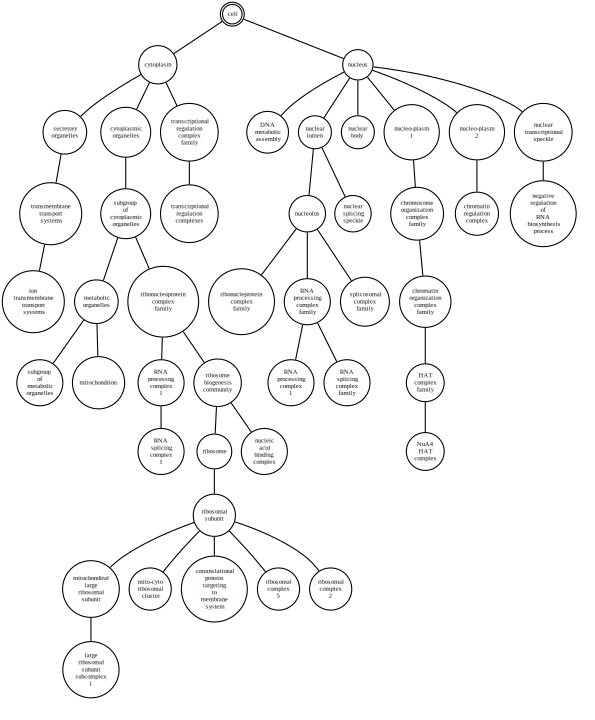

In [18]:
from bigraph_viz.dict_utils import replace_regex_recursive
music_map = {
    'cell': {
        'cytoplasm': {
            'secretory organelles': {
                'transmembrane transport systems': {
                    'ion transmembrane transport systems': {}}},
            'cytoplasmic organelles': {
                'subgroup of cytoplasmic organelles': {
                    'metabolic organelles': {
                        'subgroup of metabolic organelles': {},
                        'mitochondrion': {}},
                    'ribonucleoprotein complex family': {
                        'RNA processng complex 1': {'RNA splicing complex 1': {}},
                        'ribosome biogenesis community': {
                            'ribosome': {
                                'ribosomal subunit': {
                                    'mitochondiral large ribosomal subunit': {
                                        'large ribosomal subunit subcomplex 1': {}},
                                    'mito-cyto ribosomal cluster': {},
                                    'cotranslational protein targeting to membrane system': {},
                                    'ribosomal complex 5': {},
                                    'ribosomal complex 2': {}}},
                            'nucleic acid binding complex': {}}}}},
            'transcriptional regulation complex family': {
                'transcirptional regulation complexes': {}}},
        'nucleus': {
            'DNA metabolic assembly': {},
            'nuclear lumen': {
                'nucleolus': {
                    'ribonucleprotein complex family': {},
                    'RNA processing complex family': {
                        'RNA processing complex 1': {},
                        'RNA splicing complex family': {}},
                    'splicosomal complex family': {}},
                'nuclear splicing speckle': {}},
            'nuclear body': {},
            'nucleo-plasm 1': {
                'chromosome organization complex family': {
                    'chromatin organization complex family': {
                        'HAT complex family': {
                            'NuA4 HAT complex': {}}}}},
            'nucleo-plasm 2': {
                'chromatin regulation complex': {}},
            'nuclear transcriptional speckle': {
                'negative regulation of RNA biosynthesis process': {}}}}}
music_map = replace_regex_recursive(music_map)
plot_bigraph(music_map, **plot_settings, filename='cell_hierarchy')

## Whole-cell E. coli model

We here plot the multiscale map of a cell from [Macklin et al. Simultaneous cross-evaluation of heterogeneous E. coli datasets via mechanistic simulation. Science. 2020.](https://pubmed.ncbi.nlm.nih.gov/32703847/)

In [23]:
ecoli = { 
    'chromosome-structure': { 
        '_wires': {
            'fragmentBases': ('bulk',),
            'molecules': ('bulk',),
            'active_tfs': ('bulk',),
            'subunits': ('bulk',),
            'amino_acids': ('bulk',),
            'active_replisomes': ('unique', 'active_replisome'),
            'oriCs': ('unique', 'oriC'),
            'chromosome_domains': ('unique', 'chromosome_domain'),
            'active_RNAPs': ('unique', 'active_RNAP'),
            'RNAs': ('unique', 'RNA'),
            'active_ribosome': ('unique', 'active_ribosome'),
            'full_chromosomes': ('unique', 'full_chromosome'),
            'promoters': ('unique', 'promoter'),
            'DnaA_boxes': ('unique', 'DnaA_box')
        }
    },
    'metabolism': { 
        '_wires': {
            'metabolites': ('bulk',),
            'catalysts': ('bulk',),
            'kinetics_enzymes': ('bulk',),
            'kinetics_substrates': ('bulk',),
            'amino_acids': ('bulk',),
            'environment': ('environment',),
            'amino_acids_total': ('bulk',)
        }
    },
    'tf-binding': { 
        '_wires': {
            'promoters': ('unique', 'promoter'),
            'active_tfs': ('bulk',),
            'active_tfs_total': ('bulk',),
            'inactive_tfs_total': ('bulk',),
        }
    },
    'transcript-initiation': { 
        '_wires': {
            'environment': ('environment',),
            'full_chromosomes': ('unique', 'full_chromosome'),
            'RNAs': ('unique', 'RNA'),
            'active_RNAPs': ('unique', 'active_RNAP'),
            'promoters': ('unique', 'promoter'),
            'molecules': ('bulk',),
        }
    },
    'transcript-elongation': { 
        '_wires': {
            'environment': ('environment',),
            'RNAs': ('unique', 'RNA'),
            'active_RNAPs': ('unique', 'active_RNAP'),
            'molecules': ('bulk',),
            'bulk_RNAs': ('bulk',),
            'ntps': ('bulk',),
        }
    },
    'rna-degradation': { 
        '_wires': {
            'charged_trna': ('bulk',),
            'bulk_RNAs': ('bulk',),
            'nmps': ('bulk',),
            'fragmentMetabolites': ('bulk',),
            'fragmentBases': ('bulk',),
            'endoRnases': ('bulk',),
            'exoRnases': ('bulk',),
            'subunits': ('bulk',),
            'molecules': ('bulk',),
            'RNAs': ('unique', 'RNA'),
            'active_ribosome': ('unique', 'active_ribosome'),
        }
    },
    'polypeptide-initiation': { 
        '_wires': {
            'environment': ('environment',),
            'active_ribosome': ('unique', 'active_ribosome'),
            'RNA': ('unique', 'RNA'),
            'subunits': ('bulk',)
        }
    },
    'polypeptide-elongation': { 
        '_wires': {
            'environment': ('environment',),
            'active_ribosome': ('unique', 'active_ribosome'),
            'molecules': ('bulk',),
            'monomers': ('bulk',),
            'amino_acids': ('bulk',),
            'ppgpp_reaction_metabolites': ('bulk',),
            'uncharged_trna': ('bulk',),
            'charged_trna': ('bulk',),
            'charging_molecules': ('bulk',),
            'synthetases': ('bulk',),
            'subunits': ('bulk',),
            'molecules_total': ('bulk',),
            'amino_acids_total': ('bulk',),
            'charged_trna_total': ('bulk',),
            'uncharged_trna_total': ('bulk',)
        }
    },
    'complexation': {
        '_wires': {
            'molecules': ('bulk',), 
        }
    },
    'two-component-system': { 
        '_wires': {
            'molecules': ('bulk',)
        }
    },
    'equilibrium': {
        '_wires': {
            'molecules': ('bulk',)
        }
    },
    'protein-degradation': { 
        '_wires': {
            'metabolites': ('bulk',),
            'proteins': ('bulk',)
        }
    },
    'chromosome-replication': { 
        '_wires': {
            'replisome_trimers': ('bulk',),
            'replisome_monomers': ('bulk',),
            'dntps': ('bulk',),
            'ppi': ('bulk',),
            'active_replisomes': ('unique', 'active_replisome'),
            'oriCs': ('unique', 'oriC'),
            'chromosome_domains': ('unique', 'chromosome_domain'),
            'full_chromosomes': ('unique', 'full_chromosome'),
            'environment': ('environment',)
        }
    },
    'unique': {
        'chromosome_domain': {},
        'full_chromosome': {},
        'oriC': {},
        'active_replisome': {},
        'RNA': {},
        'active_ribosome': {},
        'DnaA_box': {},
        'promoter': {},
    },
    'bulk': {},
    'environment': {},
}
node_groups = [[
        ('unique',), ('bulk',), ('environment',), 
    ],
]
# plot settings
plot_settings_ecoli = {
    'remove_process_place_edges': True,
    'rankdir': 'RL',
    'dpi': '100',
    'out_dir': 'out',
}
fig = plot_bigraph(ecoli, **plot_settings_ecoli, node_groups=node_groups, filename='ecoli')

Writing out/ecoli


[See E. coli wiring diagram](https://github.com/vivarium-collective/bigraph-viz/blob/main/doc/_static/ecoli.png?raw=true)